# Convolution Neural Network
from coursera course Tensor Flow in Practice : https://www.coursera.org/specializations/tensorflow-in-practice

object detection using fashion_minst dataset from tensor flow library

using convolution neural network and using callbacks


In [24]:
import tensorflow as tf
import numpy as np

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True


callbacks = myCallback()
        
    
mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

# reshaping into 4d because convolution requires 4d
train_images = train_images.reshape(len(train_images), 28, 28, 1)
test_images = test_images.reshape(len(test_images), 28, 28, 1)

#normalizing
train_images, test_images = train_images / 255.0, test_images / 255.0


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               819712    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 234us/sample - loss: 0.4202 - accuracy: 0.8462
Epoch 2/10
60000/60000 [==============================] - 13s 223us/sample - loss: 0.2812 - accuracy: 0.8961
Epoch 3/10
59872/60000 [============================>.] - ETA: 0s - loss: 0.2322 - accuracy: 0.9119
Reached 90% accuracy so cancelling training!
60000/60000 [==============================] - 13s 220us/sample - loss: 0.2324 - accuracy: 0.9118


# Expolring Model Result

In [37]:
prediction = model.predict(test_images)

In [47]:
tf.math.confusion_matrix(test_labels, [np.argmax(i) for i in prediction])

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[877,   2,  10,  14,   2,   2,  90,   0,   3,   0],
       [  5, 982,   1,   7,   2,   0,   1,   0,   2,   0],
       [ 23,   1, 827,   7,  69,   0,  73,   0,   0,   0],
       [ 22,   7,   9, 881,  52,   0,  29,   0,   0,   0],
       [  3,   0,  30,  16, 852,   0,  98,   0,   1,   0],
       [  0,   0,   0,   0,   0, 978,   0,  14,   1,   7],
       [145,   1,  58,  24,  52,   0, 711,   0,   9,   0],
       [  0,   0,   0,   0,   0,   8,   0, 971,   0,  21],
       [  2,   0,   7,   3,   1,   1,   4,   2, 980,   0],
       [  1,   0,   0,   0,   0,   5,   0,  37,   0, 957]])>

Label: 7
Prediction: 7


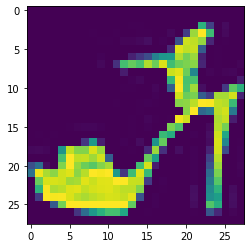

In [54]:
import matplotlib.pyplot as plt

i = 9
plt.imshow(train_images[i].reshape(28, 28))
print('Label:', test_labels[i])
print('Prediction:', np.argmax(prediction[i]))

# Visualizing the Convolutions and Pooling

In [55]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


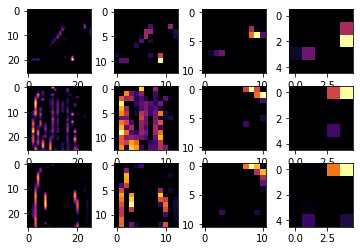

In [60]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 63

from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)